In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [3]:
file_path = "nueva_base_+300_final.csv"  # Actualiza con el nombre del archivo
data = pd.read_csv(file_path)

In [4]:
data['Activity'] = data['Activity'].map({'Antibacterial': 1, 'Otros': 0})

In [10]:
#Extraer caracteres únicos y crear un diccionario de índices
all_amino_acids = set("".join(data['Seqence']))
amino_acids_dict = {aa: i for i, aa in enumerate(sorted(all_amino_acids))}

In [11]:
amino_acids_dict

{'-': 0,
 '2': 1,
 'A': 2,
 'B': 3,
 'C': 4,
 'D': 5,
 'E': 6,
 'F': 7,
 'G': 8,
 'H': 9,
 'I': 10,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23,
 'Z': 24,
 'a': 25,
 'c': 26,
 'f': 27,
 'h': 28,
 'i': 29,
 'k': 30,
 'l': 31,
 'p': 32,
 'r': 33,
 's': 34,
 'v': 35,
 'w': 36,
 'x': 37,
 'y': 38}

In [12]:
#Función para codificar secuencias con one-hot encoding
def one_hot_encode_sequence(sequence, max_length, char_dict):
    encoded = np.zeros((max_length, len(char_dict)), dtype=np.float32)
    for i, char in enumerate(sequence[:max_length]):
        if char in char_dict:
            encoded[i, char_dict[char]] = 1.0
    return encoded


In [14]:
#Ajustar las secuencias al mismo tamaño
max_length = max(data['Seqence'].apply(len))
X = np.array([one_hot_encode_sequence(seq, max_length, amino_acids_dict) for seq in data['Seqence']])
y = data['Activity'].values


In [15]:
max_length


1256

In [ ]:
#Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Crear el modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_length, len(amino_acids_dict))),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.7815 - loss: 0.5296 - val_accuracy: 0.7937 - val_loss: 0.4676
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.8152 - loss: 0.4465 - val_accuracy: 0.7937 - val_loss: 0.4320
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7853 - loss: 0.4184 - val_accuracy: 0.8281 - val_loss: 0.3873
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8454 - loss: 0.3577 - val_accuracy: 0.8750 - val_loss: 0.3598
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9098 - loss: 0.2857 - val_accuracy: 0.8844 - val_loss: 0.3351
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8988 - loss: 0.2756 - val_accuracy: 0.8656 - val_loss: 0.3332
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9114 - loss: 0.2379 - val_accuracy: 0.8875 - val_loss: 0.3081
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9326 - loss: 0.2139 - val_accuracy: 0.8750 - 

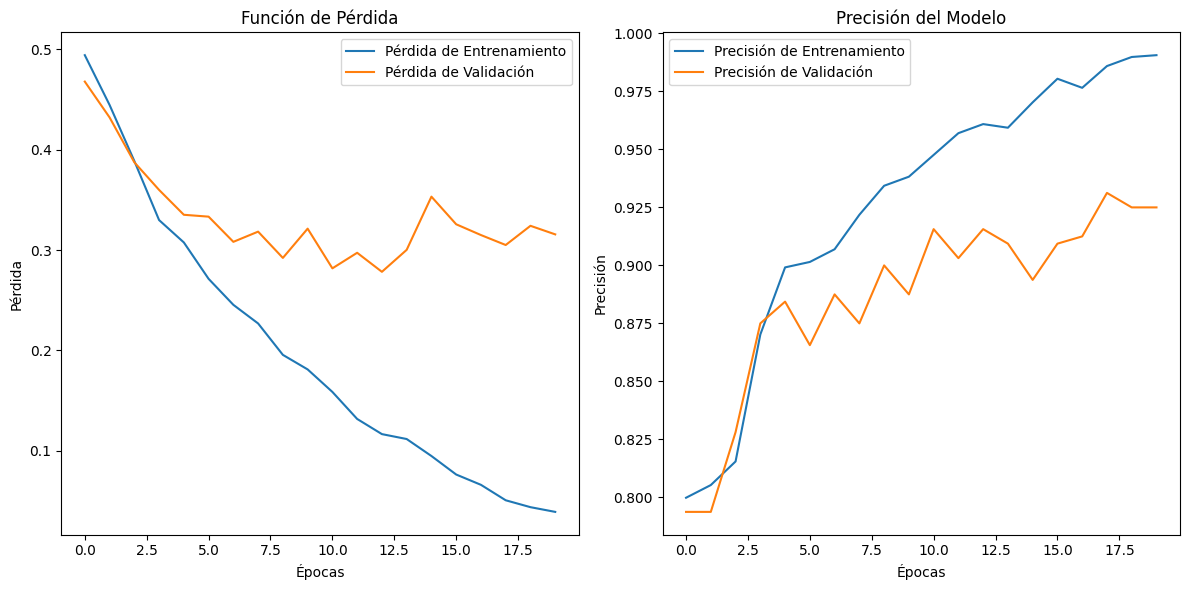

In [ ]:
#Graficar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Función de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Guardar el modelo
model_path = "modelo_cnn_antimicrobiano_300+NUEVA.h5"
model.save(model_path)
print(f"Modelo guardado en {model_path}")

Modelo guardado en modelo_cnn_antimicrobiano_300+NUEVA.h5


In [ ]:
#Cargar y predecir
def predict_sequence(sequence, model_path, max_length, char_dict):
    model = tf.keras.models.load_model(model_path)
    sequence_encoded = one_hot_encode_sequence(sequence, max_length, char_dict)
    sequence_encoded = np.expand_dims(sequence_encoded, axis=0)
    prediction = model.predict(sequence_encoded)[0, 0]
    return "Antibacterial" if prediction > 0.5 else "Otros"


In [ ]:
test_sequence = "AELRCMCIKTTSGIHPKNIQSLEVIGKGTHCNQVEVIAT"
resultado = predict_sequence(test_sequence, model_path, max_length, amino_acids_dict)
print(f"La secuencia {test_sequence} fue clasificada como: {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
La secuencia AELRCMCIKTTSGIHPKNIQSLEVIGKGTHCNQVEVIAT fue clasificada como: Antibacterial


In [ ]:
# Ejemplo de predicción
test_sequence2 = "YKVTMTCSAS"
resultado = predict_sequence(test_sequence2, model_path, max_length, amino_acids_dict)
print(f"La secuencia {test_sequence2} fue clasificada como: {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
La secuencia YKVTMTCSAS fue clasificada como: Otros


In [ ]:
# Ejemplo de predicción
test_sequence3 = "VIADKYYGNGVSCGKHTCTVDWGEAFSCSVSHLANFGHGKC"
resultado = predict_sequence(test_sequence3, model_path, max_length, amino_acids_dict)
print(f"La secuencia {test_sequence3} fue clasificada como: {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
La secuencia VIADKYYGNGVSCGKHTCTVDWGEAFSCSVSHLANFGHGKC fue clasificada como: Antibacterial


In [ ]:
# Ejemplo de predicción
test_sequence4 = "WEEWDKKIEEYTKKIEELIKKSEEQQKKN"
resultado = predict_sequence(test_sequence4, model_path, max_length, amino_acids_dict)
print(f"La secuencia {test_sequence4} fue clasificada como: {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
La secuencia WEEWDKKIEEYTKKIEELIKKSEEQQKKN fue clasificada como: Otros


In [ ]:
# Ejemplo de predicción
test_sequence2 = "YKVTMTCSAS"
resultado = predict_sequence(test_sequence2, model_path, max_length, amino_acids_dict)
print(f"La secuencia {test_sequence2} fue clasificada como: {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
La secuencia YKVTMTCSAS fue clasificada como: Otros
